In [12]:
# Dependencies and Setup

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#data science - standard library
import pandas as pd
import numpy as np

#requests
import requests
from pprint import pprint
import time

#regression
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import API key city py 
from api_keys import weather_api_key
from citipy import citipy

output_data_file = "2020_WeaterDataIncluded.csv"
file_path = "Vertical_Merge_LatLng.csv"

In [2]:
print(weather_api_key)

00825af8d70c265adf45df18ddf6575c


In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year,Latitude,Longitude
0,Finland,1,7.8087,1.063927,0.954330,0.719008,0.949172,0.195445,-0.059482,2020,61.924110,25.748151
1,Denmark,2,7.6456,1.077400,0.955991,0.724025,0.951444,0.168489,0.066202,2020,56.263920,9.501785
2,Switzerland,3,7.5599,1.097993,0.942847,0.741024,0.921337,0.303728,0.105911,2020,46.818188,8.227512
3,Iceland,4,7.5045,1.077256,0.974670,0.730000,0.948892,0.711710,0.246944,2020,64.963051,-19.020835
4,Norway,5,7.4880,1.108780,0.952487,0.732008,0.955750,0.263218,0.134533,2020,60.472024,8.468946


In [5]:
lat_lngs = []
cities = []

lats = df["Latitude"]
lngs = df["Longitude"]
lat_lngs = zip(lats, lngs)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

len(cities)

153

In [6]:

temps = []
feel_likes = []
humids = []
pressures = []
speeds = []
cloudiness = []
cities_found = []

for i in range(len(cities)):
    #get the city
    city = cities[i]
    
    #create the url
    units = "imperial"
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&appid={weather_api_key}"
#     print(url)

    #make the request
    response = requests.get(url)
#     print(response.status_code)
    
    #error check
    if response.status_code == 200:
        data = response.json()
#         pprint(data)
        
        try:
            #extract the data
            temp = data["main"]["temp"]
            feels_like = data["main"]["feels_like"]
            humidity = data["main"]["humidity"]
            pressure = data["main"]["pressure"]
            speed = data["wind"]["speed"]
            clouds = data["clouds"]["all"]
            city_name = data["name"]

            #save the data
            temps.append(temp)
            feel_likes.append(feels_like)
            humids.append(humidity)
            pressures.append(pressure)
            speeds.append(speed)
            cloudiness.append(clouds)
            cities_found.append(city_name)
        except Exception as e:
            print(f"Through exception for city {city}: {e}")
            
    elif response.status_code == 404:
        temps.append(np.nan)
        feel_likes.append(np.nan)
        humids.append(np.nan)
        pressures.append(np.nan)
        speeds.append(np.nan)
        cloudiness.append(np.nan)
        cities_found.append(np.nan)
        print(f"Missing data in OpenWeatherAPI for {city}")
    else:
        print(response.status_code)
        print("Oh gosh darnit. The API is broken. Sad Face.")
        
    #print every 5
    if (i % 5 == 0):
        print(f"Got data for city index: {i} of {len(cities)}")
    
    #sleep for requests
    time.sleep(1)
        
# make the dataframe
df["City"] = cities_found
df["Temperature"] = temps
df["Feels Like"] = feel_likes
df["Humidity"] = humids
df["Pressure"] = pressures
df["Wind Speed"] = speeds
df["Cloudiness"] = cloudiness

df.head(10)

Got data for city index: 0 of 153
Missing data in OpenWeatherAPI for al
Got data for city index: 5 of 153
Got data for city index: 10 of 153
Got data for city index: 15 of 153
Got data for city index: 20 of 153
Missing data in OpenWeatherAPI for canitas
Got data for city index: 25 of 153
Got data for city index: 30 of 153
Got data for city index: 35 of 153
Got data for city index: 40 of 153
Got data for city index: 45 of 153
Got data for city index: 50 of 153
Missing data in OpenWeatherAPI for guata
Got data for city index: 55 of 153
Got data for city index: 60 of 153
Got data for city index: 65 of 153
Missing data in OpenWeatherAPI for karakendzha
Got data for city index: 70 of 153
Missing data in OpenWeatherAPI for iskele
Got data for city index: 75 of 153
Got data for city index: 80 of 153
Missing data in OpenWeatherAPI for play cu
Got data for city index: 85 of 153
Missing data in OpenWeatherAPI for felidhoo
Got data for city index: 90 of 153
Missing data in OpenWeatherAPI for plac

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year,Latitude,Longitude,City,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Finland,1,7.8087,1.063927,0.954330,0.719008,0.949172,0.195445,-0.059482,2020,61.924110,25.748151,Jyvaskyla,30.42,24.73,100.0,1029.0,3.36,90.0
1,Denmark,2,7.6456,1.077400,0.955991,0.724025,0.951444,0.168489,0.066202,2020,56.263920,9.501785,Kjellerup,42.80,39.51,93.0,1027.0,2.24,98.0
2,Switzerland,3,7.5599,1.097993,0.942847,0.741024,0.921337,0.303728,0.105911,2020,46.818188,8.227512,Sarnen,39.11,35.37,100.0,1028.0,2.39,90.0
3,Iceland,4,7.5045,1.077256,0.974670,0.730000,0.948892,0.711710,0.246944,2020,64.963051,-19.020835,Dalvik,32.00,24.01,86.0,990.0,6.93,90.0
4,Norway,5,7.4880,1.108780,0.952487,0.732008,0.955750,0.263218,0.134533,2020,60.472024,8.468946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Netherlands,6,7.4489,1.081271,0.939139,0.723009,0.908548,0.364717,0.207612,2020,52.132633,5.291266,Soest,49.50,47.59,98.0,1025.0,3.04,81.0
6,Sweden,7,7.3535,1.075879,0.926311,0.726008,0.939144,0.250880,0.111615,2020,60.128161,18.643501,Norrtälje,46.62,42.12,86.0,1031.0,5.01,100.0
7,New Zealand,8,7.2996,1.050094,0.949119,0.732026,0.936217,0.221139,0.191598,2020,-40.900557,174.885971,Porirua,55.69,49.80,71.0,1014.0,8.99,82.0
8,Austria,9,7.2942,1.074282,0.928046,0.730025,0.899989,0.499955,0.085429,2020,47.516231,14.550072,Hall,66.69,67.26,93.0,1017.0,8.05,90.0
9,Luxembourg,10,7.2375,1.145068,0.906912,0.726000,0.905636,0.367084,-0.004621,2020,49.815273,6.129583,Schieren,49.03,47.10,93.0,1023.0,2.24,84.0


In [7]:
df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year,Latitude,Longitude,City,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Finland,1,7.8087,1.063927,0.954330,0.719008,0.949172,0.195445,-0.059482,2020,61.924110,25.748151,Jyvaskyla,30.42,24.73,100.0,1029.0,3.36,90.0
1,Denmark,2,7.6456,1.077400,0.955991,0.724025,0.951444,0.168489,0.066202,2020,56.263920,9.501785,Kjellerup,42.80,39.51,93.0,1027.0,2.24,98.0
2,Switzerland,3,7.5599,1.097993,0.942847,0.741024,0.921337,0.303728,0.105911,2020,46.818188,8.227512,Sarnen,39.11,35.37,100.0,1028.0,2.39,90.0
3,Iceland,4,7.5045,1.077256,0.974670,0.730000,0.948892,0.711710,0.246944,2020,64.963051,-19.020835,Dalvik,32.00,24.01,86.0,990.0,6.93,90.0
4,Norway,5,7.4880,1.108780,0.952487,0.732008,0.955750,0.263218,0.134533,2020,60.472024,8.468946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,149,3.4759,0.662516,0.319460,0.452000,0.640881,0.891807,0.082410,2020,6.611111,20.939444,Ippy,67.37,70.75,82.0,1012.0,0.94,62.0
149,Rwanda,150,3.3123,0.760010,0.540835,0.610988,0.900589,0.183541,0.055484,2020,-1.940278,29.873888,Gitarama,64.40,68.16,100.0,1020.0,2.24,40.0
150,Zimbabwe,151,3.2992,0.786571,0.763093,0.556173,0.711458,0.810237,-0.072064,2020,-19.015438,29.154857,Redcliffe,78.03,72.77,47.0,1018.0,12.75,20.0
151,South Sudan,152,2.8166,0.742536,0.553707,0.510000,0.451314,0.763417,0.016519,2020,6.876992,31.306979,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dropped_df = df.dropna()
dropped_df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year,Latitude,Longitude,City,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Finland,1,7.8087,1.063927,0.954330,0.719008,0.949172,0.195445,-0.059482,2020,61.924110,25.748151,Jyvaskyla,30.42,24.73,100.0,1029.0,3.36,90.0
1,Denmark,2,7.6456,1.077400,0.955991,0.724025,0.951444,0.168489,0.066202,2020,56.263920,9.501785,Kjellerup,42.80,39.51,93.0,1027.0,2.24,98.0
2,Switzerland,3,7.5599,1.097993,0.942847,0.741024,0.921337,0.303728,0.105911,2020,46.818188,8.227512,Sarnen,39.11,35.37,100.0,1028.0,2.39,90.0
3,Iceland,4,7.5045,1.077256,0.974670,0.730000,0.948892,0.711710,0.246944,2020,64.963051,-19.020835,Dalvik,32.00,24.01,86.0,990.0,6.93,90.0
5,Netherlands,6,7.4489,1.081271,0.939139,0.723009,0.908548,0.364717,0.207612,2020,52.132633,5.291266,Soest,49.50,47.59,98.0,1025.0,3.04,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Botswana,147,3.4789,0.971120,0.779122,0.589245,0.821328,0.777931,-0.250394,2020,-22.328474,24.684866,Mopipi,72.57,68.83,67.0,1014.0,13.13,93.0
147,Tanzania,148,3.4762,0.796767,0.688933,0.574961,0.821540,0.619799,0.109669,2020,-6.369028,34.888822,Kilimatinde,68.36,67.03,77.0,1015.0,8.75,97.0
148,Central African Republic,149,3.4759,0.662516,0.319460,0.452000,0.640881,0.891807,0.082410,2020,6.611111,20.939444,Ippy,67.37,70.75,82.0,1012.0,0.94,62.0
149,Rwanda,150,3.3123,0.760010,0.540835,0.610988,0.900589,0.183541,0.055484,2020,-1.940278,29.873888,Gitarama,64.40,68.16,100.0,1020.0,2.24,40.0


In [17]:
dropped_df.to_csv(output_data_file, index=False)

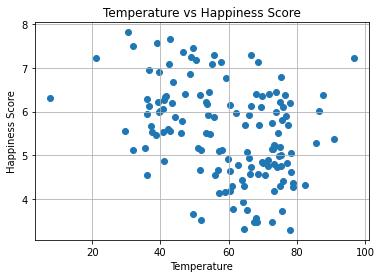

In [9]:
plt.scatter(df["Temperature"], df["Happiness Score"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature vs Happiness Score")
plt.ylabel("Happiness Score")
plt.xlabel("Temperature")
plt.grid(True)


# Show plot
plt.show()

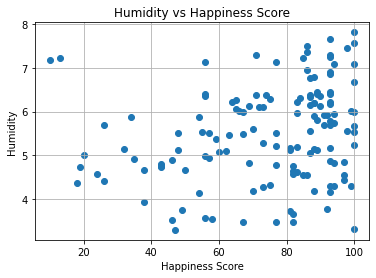

In [11]:
plt.scatter(df["Humidity"], df["Happiness Score"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity vs Happiness Score")
plt.ylabel("Humidity")
plt.xlabel("Happiness Score")
plt.grid(True)


# Show plot
plt.show()